<b> Chapter 4 is a technical chapter which will go over the mathematics behind some of the machine learning models that have been used so far.  I will be focusing on the linear algebra definitions and applications as they more succinctly embody the theories and calculations </b>

# Linear Regression

<b> Simply put linear regression is a weighted average of features and a scalar bias.  The weights are bias are chosen based off the minimization of a cost function.  The most common cost function for linear regressions is Mean Squared Error (MSE) which is rooted (RMSE) when comparing across multiple models.  The reason MSE is used is because the derivative is much simpler to compute and requires significantly less computational power than the rooted version.  Since rooting the function simply scales it, selecting MSE to minimize has the same end result as selected RMSE to minimize.  This is true in general for any cost or reward function and it is encouraged to use the form of the cost function which minimizes computational effort. </b>

## The Normal Equation

#### ${\hat{\theta}}$ = $(\mathbf{X^T}\mathbf{X})^{-1} \mathbf{X^T} \mathbf{y}$

In this equation:

${\hat{\theta}}$ is the value of $\theta$ that minimizes the cost function
<br>
$\mathbf{y}$ is the vector of target values
<br>
$\mathbf{X}$ is a matrix of features with a bias column

In [1]:
' Generate some data to validate the above expression'
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # mx + b : 3x + 4 + noise

' Introduce the constant bias'
X_b = np.c_[np.ones((100, 1)), X] # m x n matrix with column of 1's and column of X values

' Apply the normal equation'
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.99047872],
       [3.01480337]])

<b> The bias chosen was 4 and the weight was 3.  The gaussian noise introduced makes it impossible to get these exact values but the derived values are almost perfect.</b>

In [2]:
' Make some predictions'
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99047872],
       [10.02008547]])

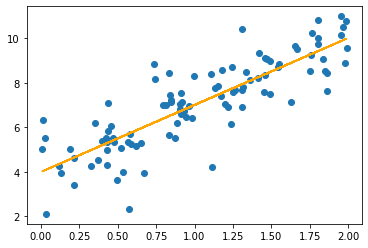

In [3]:
' Plot the raw data and the best fit predictions'
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_best), color='orange')

In [4]:
' Performing linear regression with sklearn is very simple'
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print('Bias: ', lin_reg.intercept_, 'Coefficient: ', lin_reg.coef_)

lin_reg.predict(X_new)

Bias:  [3.99047872] Coefficient:  [[3.01480337]]


array([[ 3.99047872],
       [10.02008547]])

<b> A caveat for inverted matrices is that they require a non-zero determinant.  This isn't always the case.  A work-around is the Moore-Penrose Inverse aka the pseudoinverse.  This utilizes Singular Value Decomposition to generate an equivalent matrix which is always invertible.  This method is also more computationally efficient. Sklearn ueses this method natively </b>

## Gradient Descent

<b> Gradient Descent outperforms sklearn and the Normal Equation when the dataset is extremely large (100,000+ features).  </b>

<b> General notes about gradient descent </b>
* Tweaks parameters iteratively in order to minimize a cost function
* Not all cost functions are convex.  As such, one hurdle for gradient descent is overcoming local minima and plateaus
* The learning rate is the primary parameter for correctly finding the absolute minima.  Too high and the optimizer will diverge and never find a minima. Too low and it will stop too soon at a local minima
* Because a convex function has exactly 1 minima they are ideal. If possible, transform the cost function such that its transformation is convex.
* Scaling all features has an enormous impact on how long it takes for the optimizer to find the mininma. 
* Gradient descent utilizes the properties of partial derivatives.  As such, a less complex derivative is arguably more important than a convex, continuous function.  Both is ideal.

## Gradient Vector of the Cost Function

#### $\nabla_{\boldsymbol\theta}MSE(\boldsymbol\theta) = \frac{2}{m}\mathbf{X}^{T}(\mathbf{X}\boldsymbol\theta - \mathbf{y})$

<br>

<b> Notice that this formula computes over the full training set X at each step.  The batch size here is 1 and as a result the training time on large datasets will be greatly impacted.  There are other ways to do this involving larger batch sizes which will be discussed later<b>

## Gradient Descent Step

#### $\boldsymbol\theta^{(next step)} = \boldsymbol\theta - \eta\nabla_{\boldsymbol\theta}MSE(\boldsymbol\theta)$

In [17]:
' Validate the above expressions'
eta = 0.1  #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    
print (theta, '\n', '\n', 'This is exactly what the Normal Equation yielded')


[[3.99047872]
 [3.01480337]] 
 
 This is exactly what the Normal Equation yielded
